**4.2**

In this project, I created a multi-layer perceptron (**MLP**) to perform classification of images. The images being classified are of digits (they are images of the numbers 1-4) from the popular **MNIST** dataset. This artificial neural network did successfully classify images (**accuracy is around 95%**!)

In this project, I tested different activation functions: relu versus sigmoid and played with the nodes and number of hidden layers.

Ultimately, I learned constructing about not only just constructing an Artificial Neural Network but also the effect of depth of the network and activation function.

*Decreasing nodes in the hidden layer*
- When too few nodes in the hiddn layer, the network struggles to read patterns in the data (underfitting). This observation is derived from performance on test and training datasets. The model has lower accuracy (less than 90%) and does not translate well to the test dataset from training.

*Increasing nodes in hidden layer*
  -One issue with too many nodes in the hidden layer is that teh data is then overfit. Overfitting the data means that the model has memorized the training data and relies on it too heavily. Therefore, it cannot generalize from it. It captures noise and other idiosyncracies in the trainnig data and does a poor job when applied to new, unseen data. This type of model performs very well on training data and poorly on the test dataset.

*Increasing number of hidden layers in the model*

- In this circumstance, the more layers in the ANN, the better it could preform on the training and test datasets. Adding layers typically might increase performance of a model on the test dataset, but adding an excess can once again lead to overfitting of the data. This was an observation derived from the training losses and shape of categorical cross-entropy loss function.

**Observation Summary**

Ultimately, I changed the activation function from relu (R) to sigmoid (S) and report below my findings. The 64 relu/sigmoid was most accurate but relu could lead to overfitting (this observation is supported by the shape of the cross-correlation plot).

 *Findings*

- 32 RELU:
  Loss: .02991 / Accuracy: .9306
- 32 SIGMOID:
  Loss: .2963 / Accuracy: .9098
- 16 SIGMOID:
  Loss: .4215 / Accuracy: .8743
  -See epoch 1-10 accuracy and loss reported below
- 16 RELU:
  Loss: .6434 / Accuracy: .7847
- 64 RELU:
  Loss: .2790 / Accuracy: .9488
- 64 SIGMOID:
  Loss: .2790 / Accuracy: .9151
- 64 SIGMOID (2 hidden layers):
Accuracy: .9237 / Loss: .2568



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train shape: (60000, 784)
Number of images in x_train 60000
Number of images in x_test 10000


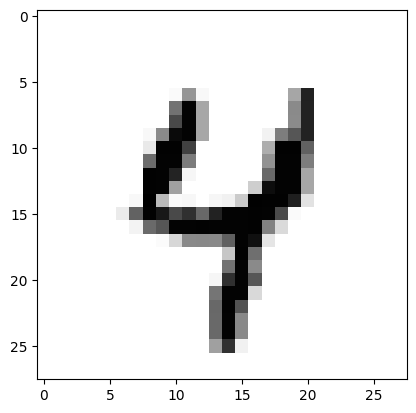

In [1]:
# P2: MNIST Classification using a Multi Layer Perceptron

# Import numpy, Tensorflow and Keras to build and run a custom ANN
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get the MNIST dataset from Keras for training and testing; x - input image, y - output label
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape the input data to fit the Keras ANN model - (Nsamples, 28, 28) is converted to (Nsamples, 28*28)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

# Check sample image - change index to try different inputs
image_index = 1111
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

In [2]:
# 32 and sigmoid: Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation

# Set activation layer - sigmoid or relu
act_layer = 'sigmoid'
#act_layer  'relu'

# Creating a Sequential Model and add the layers - hidden and output
model = Sequential()

# Add 1st hidden layer
model.add(Dense(64, input_dim=784, activation=act_layer))
# Add 2nd hidden layer - if needed
# model.add(Dense(128, activation=act_layer))
# model.add(Dense(16, input_dim=784, activation=act_layer))
# model.add(Dense(32, input_dim=784, activation=act_layer))


# randomly drop few connections - to reduce memory and may improve accuracy
# model.add(Dropout(0.2))

# Output layer - 10 nodes for 10 output lables 0,1,...,9
model.add(Dense(10, activation=tf.nn.softmax))

# Print summary of model built - look at number of parameters needed; more params -> more resources
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,730 (49.73 KB)

 Trainable params: 12,730 (49.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the ANN model with specific optimizer, loss function and performance metric
# optimizer = sgd for stochastic gradient descent, OR adam -
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the ANN model iteratively for N epochs
n_epochs = 10
history = model.fit(x=x_train,y=y_train, epochs=n_epochs)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 1.0619 - accuracy: 0.7150
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5593 - accuracy: 0.8435
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4875 - accuracy: 0.8559
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4673 - accuracy: 0.8585
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4571 - accuracy: 0.8598
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4541 - accuracy: 0.8619
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4274 - accuracy: 0.8719
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4360 - accuracy: 0.8697
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4011 - accuracy: 0.8799
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.40

313/313 [==============================] - 1s 2ms/step - loss: 0.4215 - accuracy: 0.8743
Test accuracy: 0.8743000030517578
1/1 [==============================] - 0s 97ms/step

Prediction: 4

Actual input


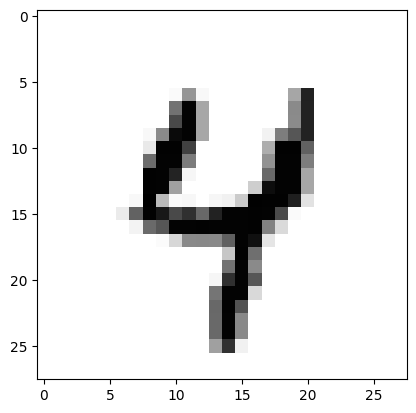

In [ ]:
# Evaluate the ANN model with the test samples
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

# Check the ANN with an example
image_index = 1111
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28*28))
print('\nPrediction:', pred.argmax())
print('\nActual input')

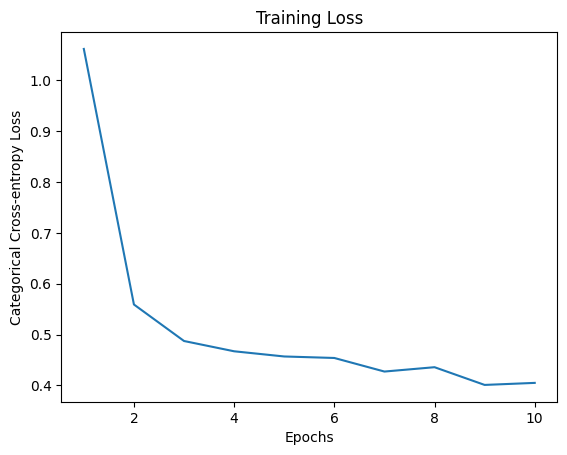

In [ ]:
# Plot the Training Loss - loss should decrease and approach 0 with number of epochs
x = list(range(1, n_epochs+1))
ty = history.history['loss']
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross-entropy Loss')
plt.plot(x,ty)

 **Neuron Model**

In [ ]:
Vthresh = 1
Cmem = 1e-12 #1pF
Erev = 2.0
lrn_rate = 0.2
Gleak = 1e-8
Eleak = 0.0
I0 = 1e-6 #
I1 = 1e-6
tau_decay = 10
tau_learn = 100
dt = 1e-6 #1us step size

# Calculate input synaptic current for neuron N2 only
# for N0 and N1 Isyn is external input current, for N2 Isyn is sum of synaptic input currents
# Gsyn is the weight change of the synapse (W0 or W1)
def calc_Isyn(Isyn, Gsyn, tspike_pre, tnow, tau_decay, Erev, Vmem):
    Isyn[tnow+1] += Gsyn*np.exp((tspike_pre-tnow)/tau_decay)*(Erev-Vmem[tnow])
    return Isyn

# Calcuate membrane voltage for neurons N0, N1 and N2 -
# for N0 and N1 Isyn is external input current, for N2 Isyn is sum of synaptic input currents
def calc_Vmem(Vm_init, Isyn, Cmem, dt):
    return Vm_init + np.sum(Isyn, axis=0)*dt/Cmem + Gleak*(Eleak-Vm_init)*dt/Cmem

# STDP Weight update rule - delta(Gsyn) is the weight change of the synapse (W0 or W1)
def train_STDP(lrn_rate, tpre, tpost, tau_learn):
    return lrn_rate*np.sign(tpost-tpre)*np.exp(np.sign(tpre-tpost)*(tpost-tpre)/tau_learn)

#